In [38]:
import pandas as pd
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt


In [39]:
# โหลดข้อมูลจากไฟล์
data = pd.read_csv('./HyperLeda_meandata_cleaned.csv', skiprows=[1])

# ลองดูข้อมูล 5 แถวแรก
print(data.head())


/var/folders/b8/w5gq0wdx1pbbwwjv87lm8c_c0000gn/T/ipykernel_28641/3197015940.py:2: DtypeWarning: Columns (0,3,4,5,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./HyperLeda_meandata_cleaned.csv', skiprows=[1])


       pgc                       objname objtype     al1950     de1950  \
0  6765534  [HGD2014]J090851.31+112411.2       G     9.1023  11.606306   
1  6763818  [HGD2014]J083712.19+152614.7       G   8.573339   15.61244   
2  6762792  [HGD2014]J101636.44+385718.1       G  10.227426  39.204739   
3  6762141  [HGD2014]J084248.87+363229.5       G   8.660349  36.721598   
4  6764748  [HGD2014]J084354.63+362732.4       G   8.678689  36.640089   

      al2000     de2000          l2         b2        sgl  ...  vvir  v3k  \
0   9.147589  11.403129  218.316404  35.624364  79.148968  ...   NaN  NaN   
1   8.620054  15.437440  210.199875  30.223531  66.661340  ...   NaN  NaN   
2  10.276792  38.955030  182.748679  55.766619  65.467948  ...   NaN  NaN   
3   8.713578  36.541545  186.135703  37.262571  51.843396  ...   NaN  NaN   
4   8.731843  36.459020  186.279582  37.468093  52.115657  ...   NaN  NaN   

  modz e_modz mod0 e_mod0 modbest e_modbest mabs  e_mabs  
0  NaN    NaN  NaN    NaN     NaN

In [40]:
# เอาเฉพาะแถวที่มีค่าความเร็ว v (จำเป็นต้องมีเพื่อคำนวณระยะทาง)
data = data.dropna(subset=['v', 'al2000', 'de2000'])  # ต้องมีพิกัดด้วย


In [41]:
# กำหนดค่าคงที่ฮับเบิล
H0 = 70 * (u.km / u.s / u.Mpc)

# ความเร็ว (v) ใส่หน่วย km/s
v = data['v'].values * (u.km / u.s)

# คำนวณระยะทาง
d_mpc = v / H0             # ได้ระยะทางเป็น Mpc
d_lyr = d_mpc.to(u.lyr)    # แปลงเป็น Light year
d_glyr = d_lyr.value / 1e9 # แปลงเป็นพันล้านปีแสง (Glyr)

# เก็บลง DataFrame
data['dm'] = d_glyr


In [43]:
# บังคับให้ al2000 และ de2000 เป็น float
data['al2000'] = pd.to_numeric(data['al2000'], errors='coerce')
data['de2000'] = pd.to_numeric(data['de2000'], errors='coerce')

# แล้วลบ NaN ที่ค้างอยู่
data = data.dropna(subset=['al2000', 'de2000', 'dm'])


In [44]:
# --- Cartesian Coordinates ---
data['x'] = data['dm'] * np.cos(np.radians(data['de2000'])) * np.cos(np.radians(data['al2000'] * 15))
data['y'] = data['dm'] * np.cos(np.radians(data['de2000'])) * np.sin(np.radians(data['al2000'] * 15))
data['z'] = data['dm'] * np.sin(np.radians(data['de2000']))


In [45]:
mask = data['x'].notna() & data['y'].notna() & data['z'].notna()
data_plot = data[mask]

In [46]:
print(f"✅ มีข้อมูลพร้อม plot {len(data_plot)} จุดแล้ว!")

✅ มีข้อมูลพร้อม plot 87256 จุดแล้ว!


In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

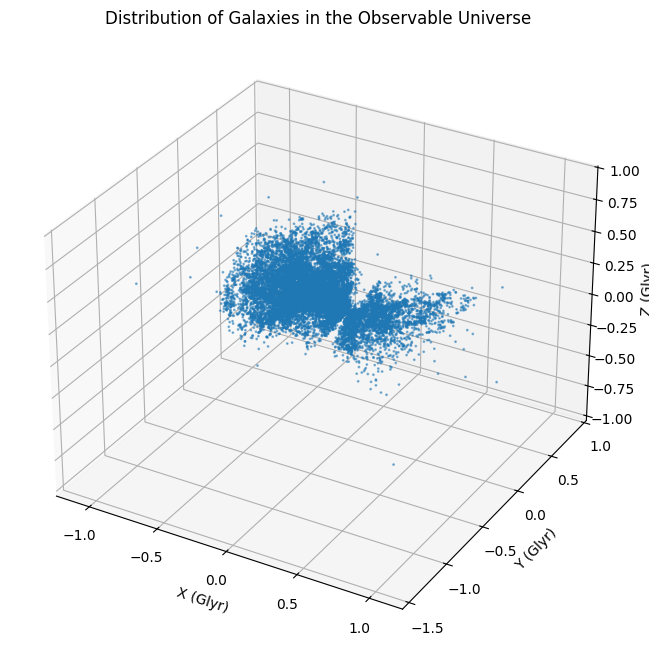

In [49]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_plot['x'], data_plot['y'], data_plot['z'], s=1, alpha=0.5)

ax.set_xlabel('X (Glyr)')
ax.set_ylabel('Y (Glyr)')
ax.set_zlabel('Z (Glyr)')
ax.set_title('Distribution of Galaxies in the Observable Universe')

plt.show()

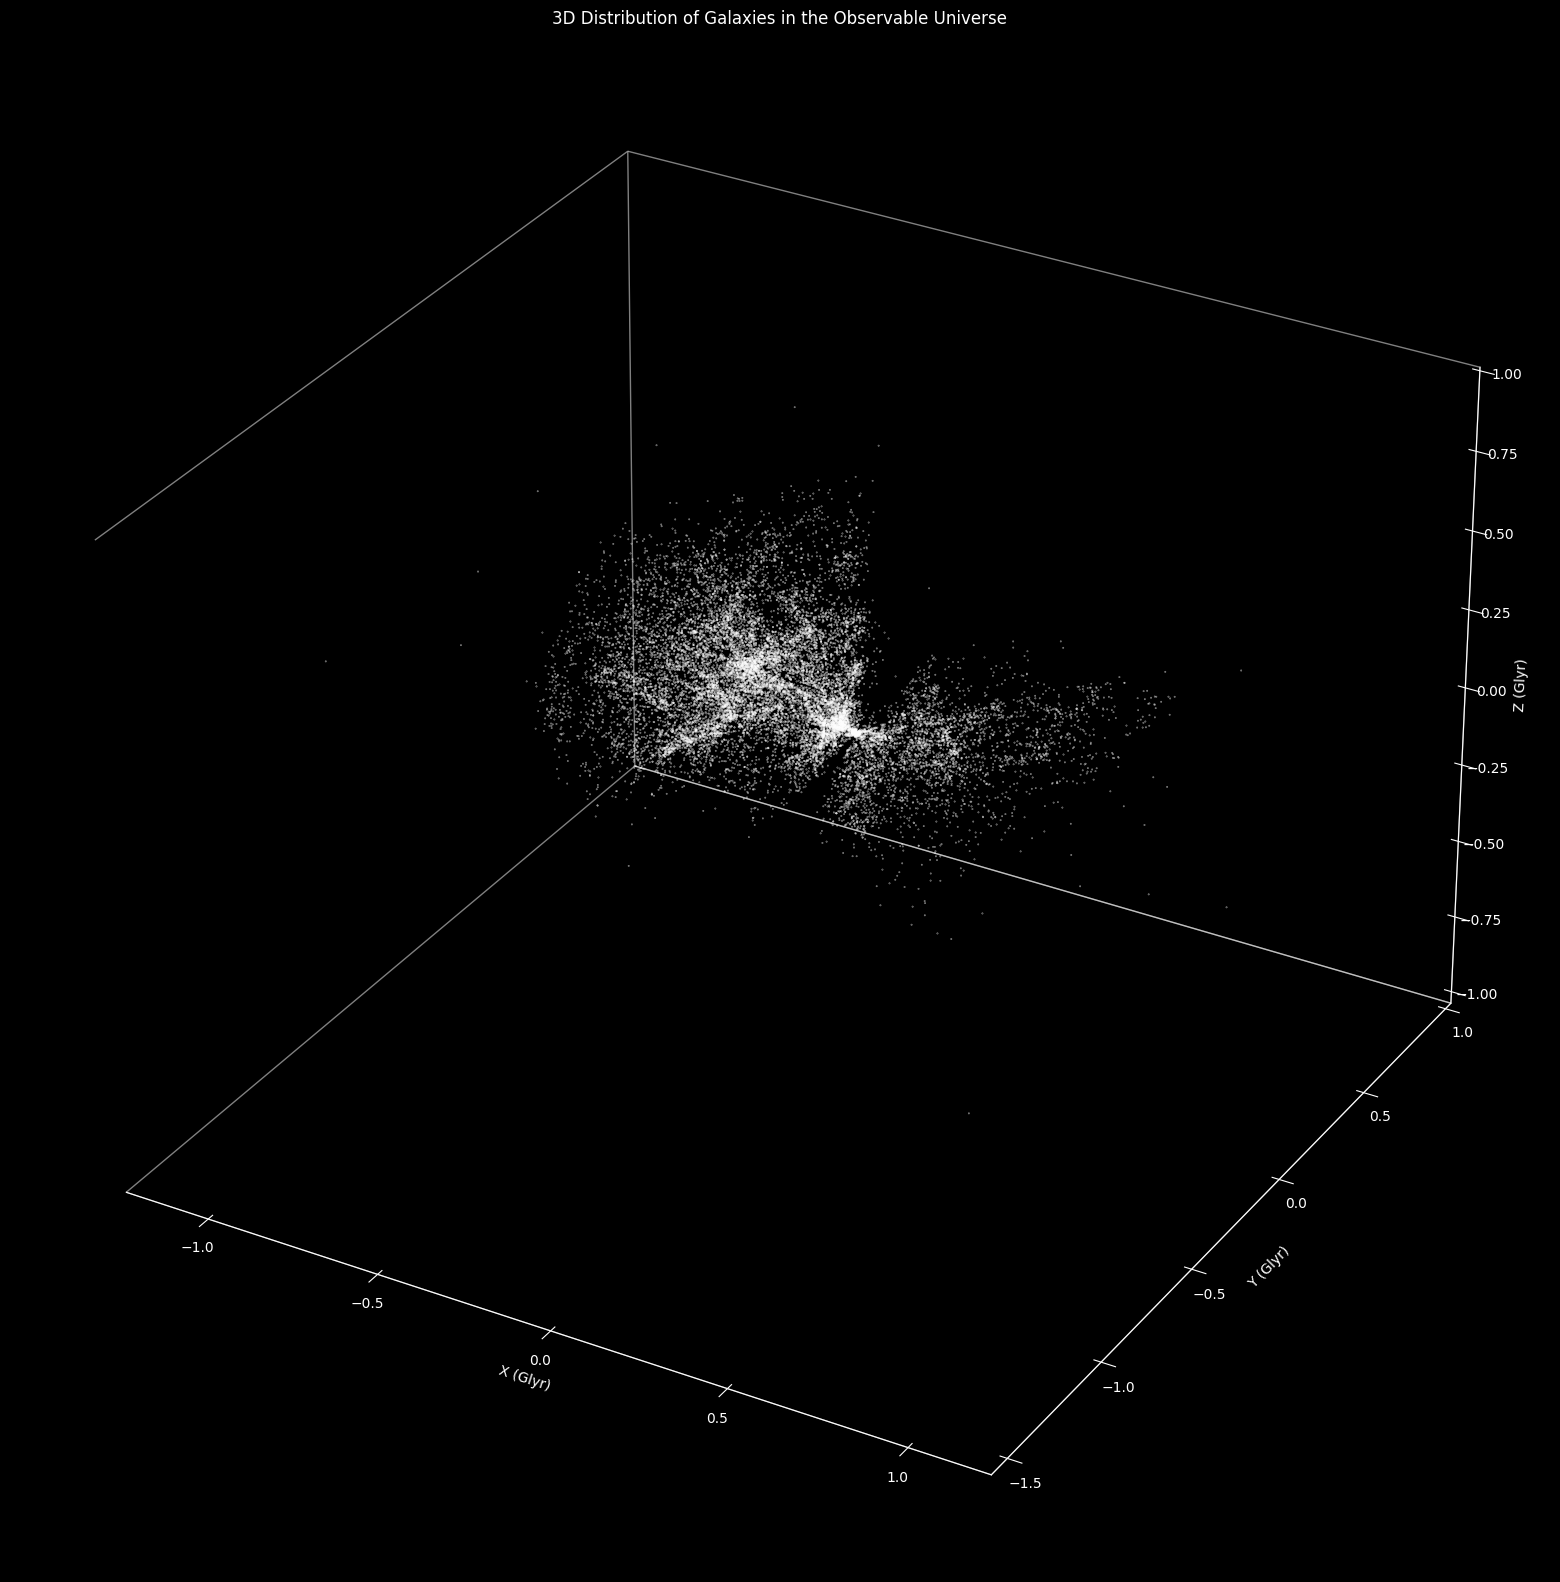

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ตั้งค่าให้กราฟ 3D ดูสะอาด
def set_3d_plot_options(ax):
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    
    ax.xaxis.pane.set_edgecolor('white')
    ax.yaxis.pane.set_edgecolor('white')
    ax.zaxis.pane.set_edgecolor('white')
    ax.grid(False)

# เตรียม Figure
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')

# ตั้งค่า 3D
set_3d_plot_options(ax)

# พล็อตจุด
ax.scatter3D(
    data['x'], 
    data['y'], 
    data['z'], 
    s=0.1, 
    c='white', 
    alpha=0.7,  # หรือ alpha=1.0
)

# ตั้งชื่อแกน
ax.set_xlabel('X (Glyr)')
ax.set_ylabel('Y (Glyr)')
ax.set_zlabel('Z (Glyr)')

# ตั้งชื่อกราฟ
ax.set_title('3D Distribution of Galaxies in the Observable Universe')

# แสดงผล
plt.show()


In [50]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import os

# --- เตรียมค่า frame ---
max_dms = [x for x in np.arange(28, 0, -1)] + [round(x, 1) for x in np.arange(0.9, 0, -0.1)]

# --- สร้างโฟลเดอร์ไว้เซฟไฟล์ถ้ายังไม่มี ---
os.makedirs('./plots', exist_ok=True)

# --- เตรียมฟิกเกอร์ ---
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

def set_3d_plot_options(ax):
    """กำหนด Option ของกราฟ 3D"""
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_facecolor('black')
    ax.grid(alpha=0.3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

def update(max_dm):
    """อัปเดตแต่ละ frame"""
    ax.cla()  # ล้างกราฟ
    set_3d_plot_options(ax)
    
    # กรองข้อมูล
    data_dm = data[data['dm'] <= max_dm]
    
    # วาด scatter
    ax.scatter(
        data_dm['x'], 
        data_dm['y'], 
        data_dm['z'], 
        s=0.5, 
        c='white', 
        alpha=0.6
    )
    
    # ตั้งชื่อกราฟ
    ax.set_title(f'Observable Universe up to {max_dm:.1f} billion lightyears', color='white')
    
    return []

# --- สร้าง Animation ---
ani = animation.FuncAnimation(
    fig,
    update,
    frames=max_dms,
    interval=200,  # เปลี่ยนเฟรมทุก 200 ms
    blit=True,
)

# --- เซฟเป็น .gif ---
ani.save('./plots/animation-3d.gif', writer='pillow')

# ปิดฟิกเกอร์
plt.close(fig)

print("✅ Save แล้วที่ './plots/animation-3d.gif'")


✅ Save แล้วที่ './plots/animation-3d.gif'


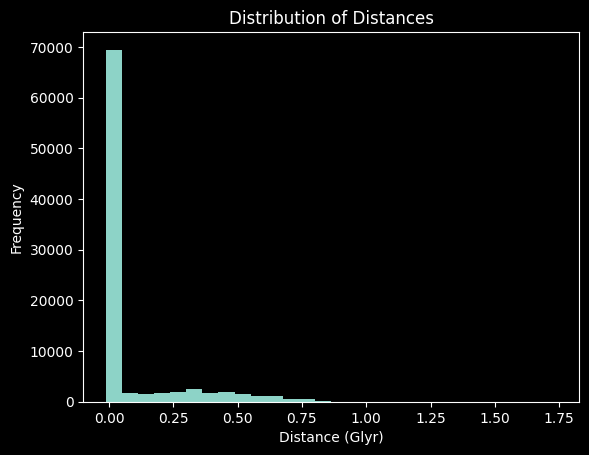

In [51]:
# First, load the matplotlib library
import matplotlib.pyplot as plt

# Set the dark background style
plt.style.use('dark_background')

# Plot histogram (no .value needed)
plt.hist(data['dm'], bins=28)

# Label the axes
plt.xlabel('Distance (Glyr)')
plt.ylabel('Frequency')
plt.title('Distribution of Distances')

# Show the plot
plt.show()


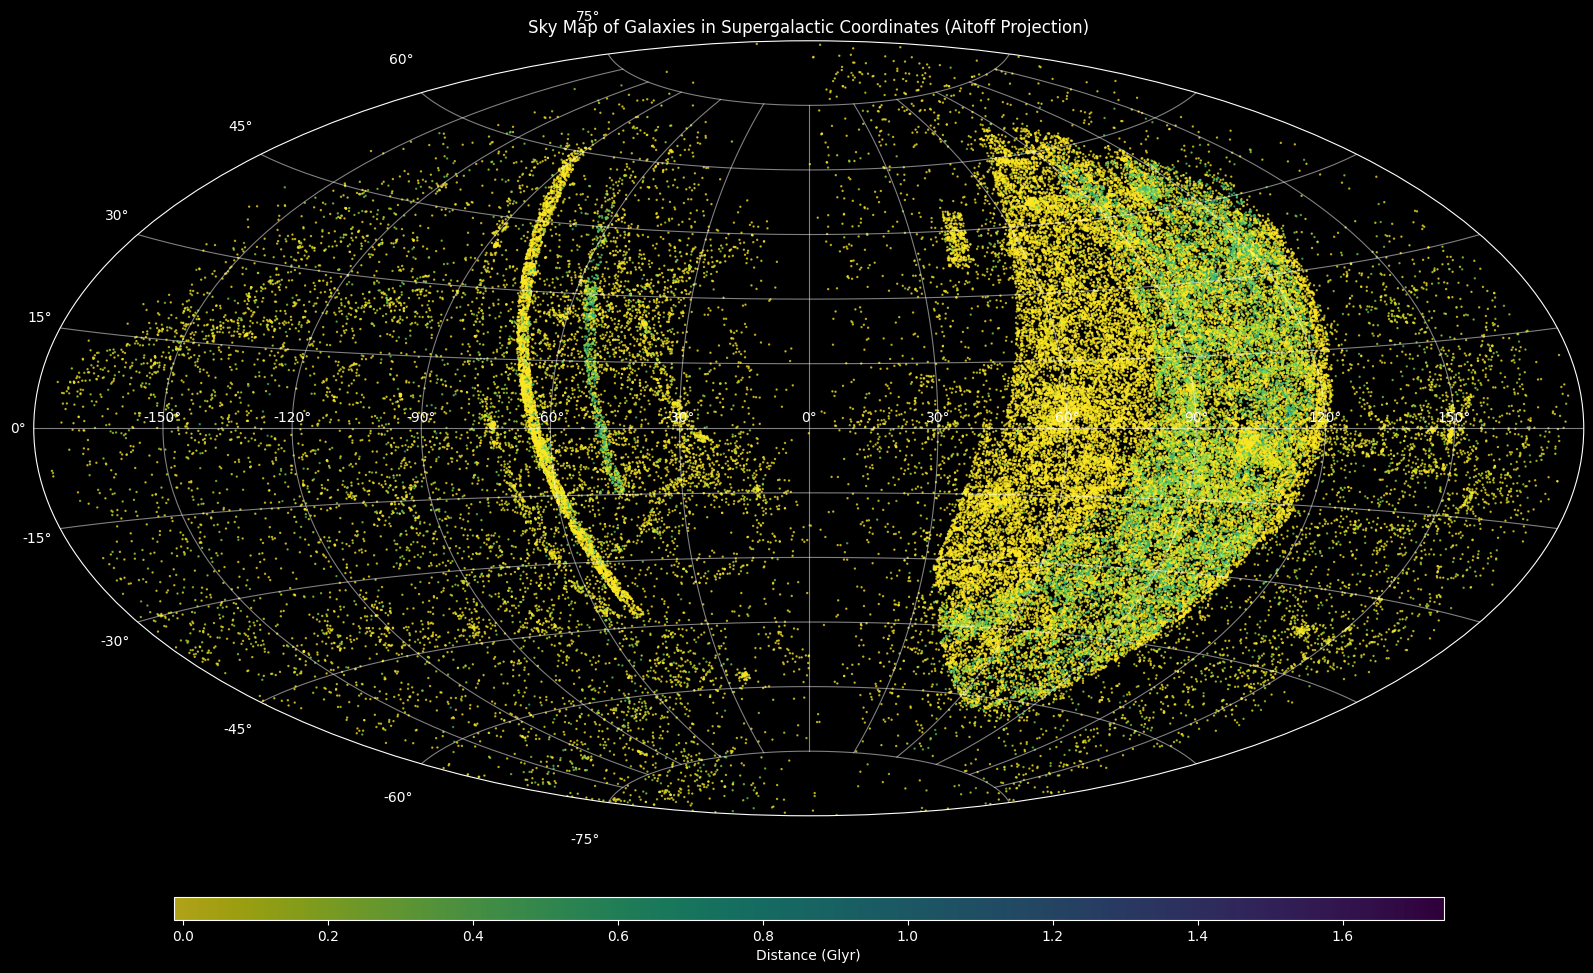

In [53]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt

# Create SkyCoord object
gal = SkyCoord(
    data['sgl'].values, 
    data['sgb'].values, 
    frame='supergalactic', 
    unit=u.deg,
)

# Create figure
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(
    111, 
    projection='aitoff', 
    label='galaxies',
)
ax.grid(alpha=0.5)

# Plot scatter
img = ax.scatter(
    gal.sgl.wrap_at(180 * u.deg).radian,  # ❗ ใช้ gal.sgl
    gal.sgb.radian,                      # ❗ ใช้ gal.sgb
    s=0.5, 
    c=data['dm'], 
    cmap=plt.cm.viridis_r, 
    alpha=0.7,
    linestyle='None',
)

# Add colorbar
fig.colorbar(
    img, 
    orientation='horizontal', 
    aspect=55, 
    label='Distance (Glyr)',
    pad=0.07, 
    fraction=0.020,
)

# Show
plt.title('Sky Map of Galaxies in Supergalactic Coordinates (Aitoff Projection)')
plt.show()


In [54]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

# Create a new figure
fig, ax = plt.subplots(
    figsize=(20, 15), 
    subplot_kw={'projection': 'aitoff'},
)

def update(i):
    # Clear the current plot
    ax.cla()
    ax.grid(alpha=0.5)

    # Determine the dm range for this frame
    if i < 19:
        min_dm, max_dm = i * 0.5, (i + 1) * 0.5
    else:
        min_dm, max_dm = 9.5, 28

    # Filter data
    data_dm = data[
      (data['dm'] > min_dm) & (data['dm'] <= max_dm)
    ]
    
    # Create SkyCoord object
    gal = SkyCoord(
        data_dm['sgl'], 
        data_dm['sgb'], 
        frame='supergalactic', 
        unit=u.deg,
    )

    # Create scatter plot
    img = ax.scatter(
        gal.sgl.wrap_at(180 * u.deg).radian, 
        gal.sgb.radian, 
        s=0.01,
        c=data_dm['dm'], 
        cmap=plt.cm.viridis_r,
        alpha=0.7,
        linestyle='None',
    )
    
    # Set the title
    ax.set_title(
        f'Distance Range: {min_dm} - {max_dm} billion lightyears',
        fontsize=16
    )
    return img,

# Create the animation
ani = animation.FuncAnimation(
    fig, 
    update, 
    frames=range(20), 
    interval=2000, 
    blit=True,
)

# Save the animation
ani.save('./plots/animation-2d.gif', writer='pillow')

# Close the figure
plt.close(fig)
